<a href="https://colab.research.google.com/github/mbcruz96/Regression/blob/main/Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Model Functions

In [ ]:
def import_data(filename):
  df = pd.read_csv(filename)
  return df

In [ ]:
def h(x, theta):
  '''
  computes the linear combination of x and theta
  Inputs:
    - x: mxn sample matrix
    - theta: nx1 weight/bias array
  - Returns: mx1 hypothesis array
  '''
  y = np.matmul(x, theta)
  return y

In [ ]:
def cost(x, y, theta):
  '''
  computes the mean squared error of the predicted y value and true y value
  Inputs:
    - x: mxn sample matrix
    - y: mx1 ground truth array
    - theta: nx1 weight/bias array
  Returns: Mean squared error
  '''

  yhat = h(x, theta)  # predicted y value
  error = yhat - y
  square_error = np.sum(error * error)
  mse = square_error/x.shape[0]
  return mse


In [ ]:
def gradient_descent(x, y, alpha=.0001, epochs=1000):
  '''
  Iteratively computes the derivative of the loss function wrt to the
  weight/bias array
  Inputs:
    - x: mxn sample matrix
    - y: mx1 ground truth array
    - alpha: learning rate
    - epochs: number of iteration of gradient descent
  Returns: tuple
    - theta: trained weight/bias array
    - errors: array of mse values
    - weights: array of weight/bias values
  '''
  errors = []  # stores all the errors calculated
  weights = []  # stores all weight/bias values
  theta = np.zeros((x.shape[1], 1)) # weight/bias matrix
  # performing gradient descent
  for i in range(epochs):
    weights.append(theta[1])
    errors.append(cost(x, y, theta))
    weight_loss = (2/x.shape[0]) * np.sum((h(x, theta) - y) * x) # derivative wrt to weight
    bias_loss = (2/x.shape[0]) * np.sum((h(x, theta) - y))  # derivative wrt to bias
    theta[0] -= alpha * bias_loss
    for j in range(1, theta.shape[0]):
      theta[j] -= alpha * weight_loss
  return (theta, errors, weights)

#Linear Regression

In [ ]:
# importing data
df = import_data('HW2_linear_data.csv')
X = np.array(df.iloc[:, :-1]).reshape((99, 1))
X = np.hstack((np.ones((X.shape[0], 1)), X))  # sample data + bias term matrix
Y = np.array(df.iloc[:, 1]).reshape((99, 1))  # ground truth array
# computing gradient descent
theta, errors, weights = gradient_descent(X, Y)

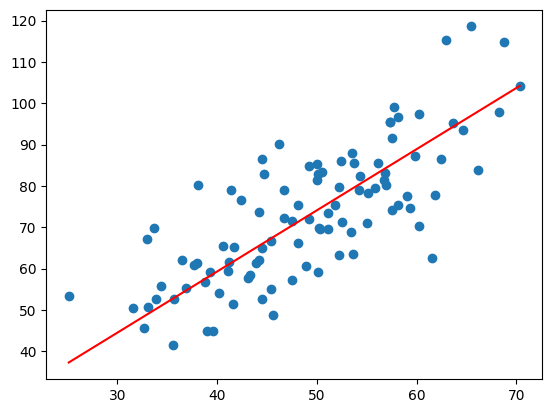

In [ ]:
#  results plot
yhat = h(X, theta)
x = X[: , 1]
plt.scatter(x, Y)
plt.plot([min(x), max(x)], [min(yhat), max(yhat)], color = 'red')
plt.show()

# Non-linear Regression

In [ ]:
def add_dimensions(X, deg):
  '''
  computes a polynomial representation of a set of sample data
  Inputs:
    - X: Sample data
    - deg: the degree of polynomial to be computed
  Returns: mxdeg sample matrix
  '''
  x = X.copy()  # copy of original sample data

  # raising each value of samples data to the power of 2 to the specified # of degrees
  # attaching new column to the original sample data
  for i in range(2, deg + 1):
    X = np.append(X, x**i, axis=1)
  return X

In [ ]:
# importing data
df = import_data('HW2_nonlinear_data.csv')
X = np.array(df.iloc[:, :-1]).reshape((100, 1))
X = add_dimensions(X, 3)
X = np.hstack((np.ones((X.shape[0], 1)), X))  # sample data + bias term matrix
Y = np.array(df.iloc[:, 1]).reshape((100, 1)) # ground truth array
# computing gradient descent
theta, errors, weights = gradient_descent(X, Y, .000001, 10000)

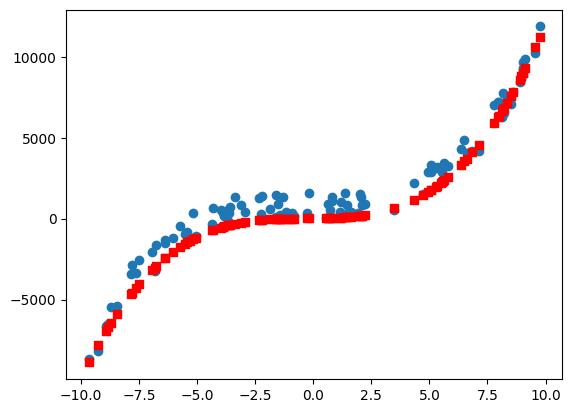

In [ ]:
# results plot
yhat = h(X, theta)
x = X[: , 1]
plt.scatter(x, Y)
plt.scatter(x, yhat, marker='s', color = 'red')
plt.show()